# [Chapter 5](https://pressbooks.bccampus.ca/thermo1/chapter/5-0-chapter-introduction-and-learning-objectives/)

## Question #8

Consider a multi-evaporator refrigration system operating with two evaporators to support cooling powers for two seperate compartments set at different temperatures. The low-temperature evaporator1 operates at a constant $-20\degree C$ and the high-temperature evaporator2 operates at $0\degree C$. To optimize the size of the condensor and the evaporators, the refrigrant R134-a is cooled down to saturated liquid at $40\degree C$ in the condensor and is heated up to saturated vapor in the evaporators. The evaporator outputs are then mixed after regulating the pressure for the high-temperature evaporator using a valve and then pressurized in the compressor while increasing to $120\degree C$ in temperature. Given the cooling loads are $150\:kW$ for both cooling compartments seperately, calculate,

a) the specific enthalpy of the refrigrant exiting the condenser

b) the specific enthalpy of the refrigrant exiting each of the evaporators

c) the flow-rate of the refrigrant through each evaporator

d) the specific enthalpy of the refrigrant entering the compressor

e) the pressure ratio of the compressor

f) the specific enthalpy of the refrigrant exiting the compressor

g) the work required in the compressor

h) the coefficient of performance (COP)

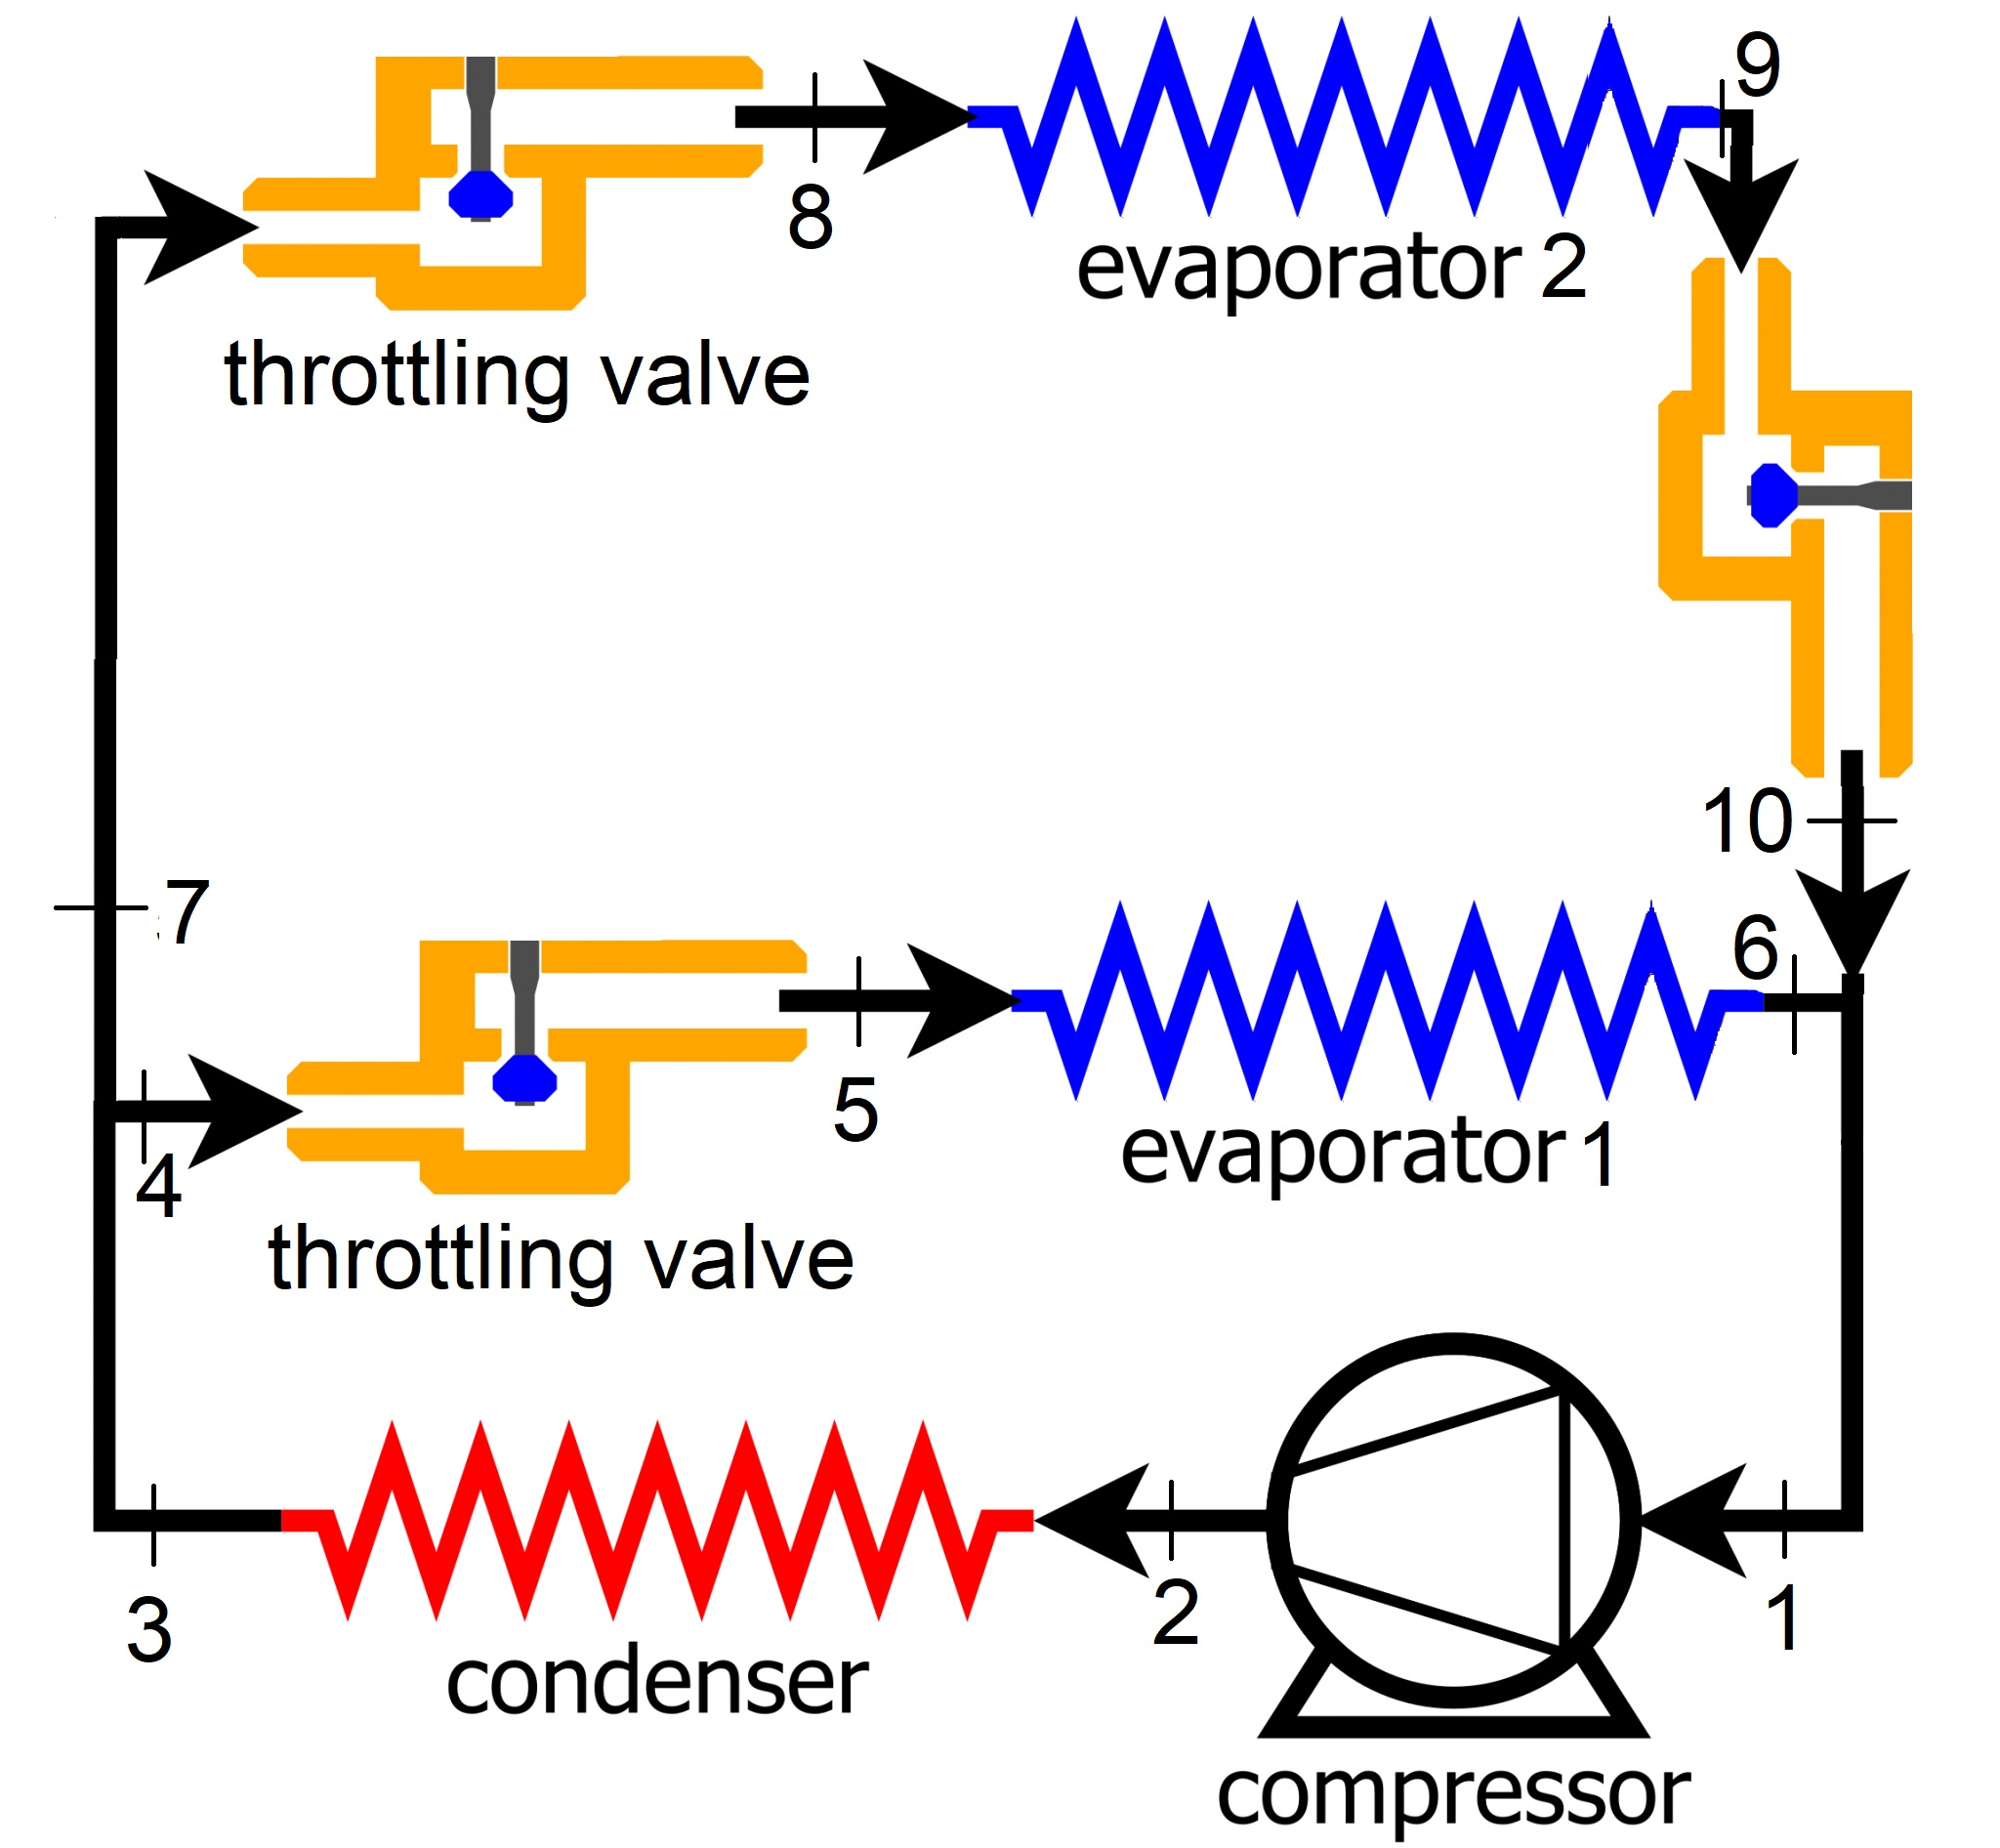

### Solution Approach for a)

the refrigrant exiting the condenser would be a sat liquid at $40\degree C$, therefore

$h_3=h_{f@40\degree C}$

In [1]:
# import the libraries we'll need
import CoolProp.CoolProp as CP

# define variables
fluid = "R134A"  # define the fluid or material of interest
T_3 = 40 + 273.15 #stete #3 temperature in K
h_3 = CP.PropsSI("H", "T", T_3, "Q", 0, fluid)/1000  # enthalpy of the refrigrant at state #3 in kJ/kg
print('The specific enthalpy of the refrigrant exiting the condenser is:', f"{h_3:.1f}", 'kJ/kg')

The specific enthalpy of the refrigrant exiting the condenser is: 256.4 kJ/kg


### Solution Approach for b)

the low-temperature evaporator operates at $-20\degree C$ and the high-temperature one operates at $0\degree C$ and the refrigrant exiting those are at their saturated liquid state to optimize evaporators' performance, therefore

$h_6=h_{g@-20\degree C}$

$h_9=h_{g@0\degree C}$

In [2]:
T_6 = -20 + 273.15 #stete #6 temperature in K
T_9 = 0 + 273.15 #stete #9 temperature in K

h_6 = CP.PropsSI("H", "T", T_6, "Q", 1, fluid)/1000  # enthalpy of the refrigrant at state #6 in kJ/kg
h_9 = CP.PropsSI("H", "T", T_9, "Q", 1, fluid)/1000  # enthalpy of the refrigrant at state #9 in kJ/kg

print('The specific enthalpy of the refrigrant exiting the evaporator 1 is:', f"{h_6:.1f}", 'kJ/kg')
print('The specific enthalpy of the refrigrant exiting the evaporator 2 is:', f"{h_9:.1f}", 'kJ/kg')

The specific enthalpy of the refrigrant exiting the evaporator 1 is: 386.6 kJ/kg
The specific enthalpy of the refrigrant exiting the evaporator 2 is: 398.6 kJ/kg


### Solution Approach for c)

to calculate the flow-rate based on cooling load, the cooling capacities for the evaporators are to be calculated first. For Evaporator 1,

$h_5=h_4$ assuming a constant enthalpy expansion valve

and 

$h_4=h_3$

therefore,

$q_{c1}=h_6-h_5$ the cooling capacity for evaporator 1

and

$\dot m_{e1}=\dot Q_{c1}/q_{c1}$ the flow-rate for evaporator 1

similarly for evaporator 2,

$h_8=h_7$ assuming a constant enthalpy expansion valve

and 

$h_7=h_3$

therefore,

$q_{c2}=h_9-h_8$ the cooling capacity for evaporator 1

and

$\dot m_{e2}=\dot Q_{c2}/q_{c2}$ the flow-rate for evaporator 1

In [3]:
#cooling loads 
Q_c1 = 100   #cooling load for evaporator 1 in kW
Q_c2 = 100   #cooling load for evaporator 1 in kW

#for evaporator 1
h_4 = h_3
h_5 = h_4
q_c1 = h_6 - h_5   #cooling capacity for evaporator 1
m_e1 = Q_c1 / q_c1   #refrigrant flow-rate in evaporator 1 in kg/s

#for evaporator 2
h_7 = h_3
h_8 = h_7
q_c2 = h_9 - h_8   #cooling capacity for evaporator 2
m_e2 = Q_c2 / q_c2   #refrigrant flow-rate in evaporator 2 in kg/s

print('The refrigrant flow-rate in evaporator 1 is:', f"{m_e1:.1f}", 'kg/s')
print('The refrigrant flow-rate in evaporator 2 is:', f"{m_e2:.1f}", 'kg/s')

The refrigrant flow-rate in evaporator 1 is: 0.8 kg/s
The refrigrant flow-rate in evaporator 2 is: 0.7 kg/s


### Solution Approach for d)

applying the first law and conservation of mass to the mixing point where two outlets from evaporators come together,

$\dot m_{10}+\dot m_6=\dot m_1$

$\dot m_{10}h_{10}+\dot m_6h_6=\dot m_1h_1$

so

$(\dot m_{10}h_{10}+\dot m_6h_6)/\dot m_1=h_1$

while 

$h_{10}=h_9$ assuming a constant enthalpy expansion

and 

$\dot m_{10}=\dot m_{e2}$

$\dot m_6=\dot m_{e1}$

In [4]:
#mass flow-rate
m_10 = m_e2
m_6 = m_e1
m_1 = m_10 + m_6

h_10=h_9

h_1 = (m_10 * h_10 + m_6 * h_6)/m_1
print('The specific enthalpy of the refrigrant entering the compressor is:', f"{h_1:.1f}", 'kJ/kg')

The specific enthalpy of the refrigrant entering the compressor is: 392.3 kJ/kg


### Solution Approach for e)

For compressor inlet, the pressure would be same pressure as is in evaporator 1 which is the saturation pressure at the low temperature($-20\degree C$)

$P_1 = P_6 = P_{sat@-20\degree C}$

For compressor outlet, the pressure would be same as working pressure for the condenser which is the saturation pressure at $40\degree C$

$P_2 = P_3 = P_{sat@40\degree C}$

$R(pressure\:ratio)=P_2/P_1$

In [5]:
P_6 = CP.PropsSI("P", "T", T_6, "Q", 1, fluid)  # sat pressure at state #6 in Pa
P_1 = P_6

P_3 = CP.PropsSI("P", "T", T_3, "Q", 1, fluid)  # sat pressure at state #3 in Pa
P_2 = P_3

R = P_2 / P_1   #the compressor pressure ratio
print('The pressure ratio of the compressor is:', f"{R:.1f}")

The pressure ratio of the compressor is: 7.7


### Solution Approach for f)

The specific enthalpy of he refrigrant at the compressor outlet is evaluated based on temperature and pressure

In [6]:
#define variables
T_2 = 120 + 273.15 #temperature of R134a at compressor outlet
h_2 = CP.PropsSI("H", "T", T_2, "P", P_2, fluid)/1000  # refrigrant enthalpy at compressor outlet in kJ/kg
print('The specific enthalpy of the refrigrant exiting the compressor is:', f"{h_2:.1f}", 'kJ/kg')

The specific enthalpy of the refrigrant exiting the compressor is: 504.1 kJ/kg


### Solution Approach for g)
Based on the first law,

$\dot W= \dot m\:(h_2-h_1)$e

In [7]:
W = m_1 * (h_2 - h_1)   #work input for compressor in kW
print('The compressor work input is:', f"{W:.1f}",'kW')

The compressor work input is: 164.4 kW


### Solution Approach for h)

$COP = Q_c(cooling\:load) / W(compressor\:work\:input)$

In [8]:
cop = (Q_c1 + Q_c2) / W
print('The COP of the cycle is:', f"{cop:.1f}")

The COP of the cycle is: 1.2
